In [1]:
import sys
sys.path.append('/home/phil/aptr')
%load_ext autoreload
%autoreload 2

In [2]:
from src.simulation import simulate_from_ids
from src.torch_solver import solve_table
from src.database import RnaDB

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
_, ptrs, coverages, otu_matrix = simulate_from_ids()

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


No IDs specified. Sampling IDs randomly:['529507.6', '1449340.3', '189425.5', '268407.5', '343509.12', '1333848.3', '557436.4', '640513.3', '1388752.3', '1345695.3']
Simulating sample 1/10:
	Genome 1/10:	529507.6
	Genome 2/10:	1449340.3
	Genome 3/10:	189425.5
	Genome 4/10:	268407.5
	Genome 5/10:	343509.12
	Genome 6/10:	1333848.3
	Genome 7/10:	557436.4
	Genome 8/10:	640513.3
	Genome 9/10:	1388752.3
	Genome 10/10:	1345695.3
Simulating sample 2/10:
	Genome 1/10:	529507.6
	Genome 2/10:	1449340.3
	Genome 3/10:	189425.5
	Genome 4/10:	268407.5
	Genome 5/10:	343509.12
	Genome 6/10:	1333848.3
	Genome 7/10:	557436.4
	Genome 8/10:	640513.3
	Genome 9/10:	1388752.3
	Genome 10/10:	1345695.3
Simulating sample 3/10:
	Genome 1/10:	529507.6
	Genome 2/10:	1449340.3
	Genome 3/10:	189425.5
	Genome 4/10:	268407.5
	Genome 5/10:	343509.12
	Genome 6/10:	1333848.3
	Genome 7/10:	557436.4
	Genome 8/10:	640513.3
	Genome 9/10:	1388752.3
	Genome 10/10:	1345695.3
Simulating sample 4/10:
	Genome 1/10:	529507.6
	Genome

In [12]:
# Genomes copy+pasted from output of simulate_from_ids:
genomes = [
    "529507.6",
    "1449340.3",
    "189425.5",
    "268407.5",
    "343509.12",
    "1333848.3",
    "557436.4",
    "640513.3",
    "1388752.3",
    "1345695.3",
]

In [18]:
solutions = solve_table(otus=otu_matrix, genome_ids=genomes, ptrs=ptrs, abundances=coverages)

/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/phil/miniconda3/envs/aPTR/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Epoch 0:	 20.6281681060791
Epoch 1:	 20.6281681060791
Epoch 2:	 20.62816619873047
Epoch 3:	 20.6281681060791
Epoch 4:	 20.6281681060791
Epoch 5:	 20.628210067749023
Epoch 6:	 20.628204345703125
Epoch 7:	 20.629018783569336
Epoch 8:	 20.63001823425293
Epoch 9:	 20.628612518310547
Epoch 10:	 20.631547927856445
Epoch 11:	 20.628185272216797
Epoch 12:	 20.62822151184082
Epoch 13:	 20.949026107788086
Epoch 14:	 20.628549575805664
Epoch 15:	 20.633512496948242
Epoch 16:	 20.628190994262695
Epoch 17:	 20.711002349853516
Epoch 18:	 20.635278701782227
Epoch 19:	 20.673564910888672
Epoch 20:	 20.628318786621094
Epoch 21:	 20.758872985839844
Epoch 22:	 20.63201332092285
Epoch 0:	 10.368334770202637
Epoch 1:	 10.368335723876953
Epoch 2:	 10.368334770202637
Epoch 3:	 10.368335723876953
Epoch 4:	 10.368968963623047
Epoch 5:	 10.368374824523926
Epoch 6:	 10.369393348693848
Epoch 7:	 10.368634223937988
Epoch 8:	 10.368342399597168
Epoch 9:	 10.368374824523926
Epoch 10:	 10.369392395019531
Epoch 11:	 1

Text(0, 0.5, 'Predicted PTR')

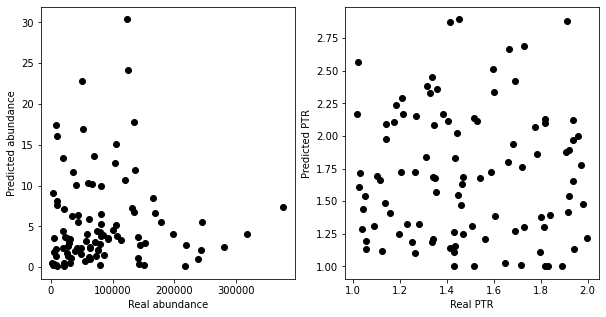

In [25]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
for a, b, solution in zip(coverages, ptrs, solutions):
    a_hat, b_hat, losses = solution
    axs[0].scatter(a, np.exp(a_hat), color="k")
    axs[1].scatter(b, np.exp(b_hat), color="k")

axs[0].set_xlabel("Real abundance")
axs[0].set_ylabel("Predicted abundance")
axs[1].set_xlabel("Real PTR")
axs[1].set_ylabel("Predicted PTR")

In [28]:
genomes = np.random.choice(RnaDB().genomes)
fig, axs = plt.subplots(4,2,figsize=(10,20))

for i, scale in enumerate([1e5, 1e6, 1e7, 1e8]):
    # Simulate
    _, coverages, ptrs, otu_matrix = simulate_from_ids(ids=genomes, scale=scale)
    # Solve
    solutions = solve_table(otu_matrix, genomes)
    # Plot
    for a,b,solution in zip(coverages, ptrs, solutions):
        a_hat, b_hat, _ = solution
        axs[i,0].scatter(a, np.exp(a_hat), color="k")
        axs[i,0].set_title(scale)
        axs[i,1].scatter(b, np.exp(b_hat), color="k")
        axs[i,1].set_title(scale)


NameError: name 'RnaDB' is not defined